[('correct', 9868), ('wrong', 132)]
1.4712496415010876 2.4565500435106817
[('correct', 10000)]
-132.18423570562825 -218.99937683183043
[('correct', 10000)]
-132.18423570562825 -218.99937683183043
[('correct', 10000)]
-132.18423570562825 -218.99937683183043
[('correct', 10000)]
-132.18423570562825 -218.99937683183043
[('correct', 10000)]
-132.18423570562825 -218.99937683183043
[('correct', 10000)]
-132.18423570562825 -218.99937683183043
[('correct', 10000)]
-132.18423570562825 -218.99937683183043
[('correct', 10000)]
-132.18423570562825 -218.99937683183043
[('correct', 10000)]
-132.18423570562825 -218.99937683183043
[('correct', 10000)]
-132.18423570562825 -218.99937683183043
[('correct', 10000)]
-132.18423570562825 -218.99937683183043
[('correct', 10000)]
-132.18423570562825 -218.99937683183043
[('correct', 10000)]
-132.18423570562825 -218.99937683183043
[('correct', 10000)]
-132.18423570562825 -218.99937683183043
[('correct', 10000)]
-132.18423570562825 -218.99937683183043
[('correct'

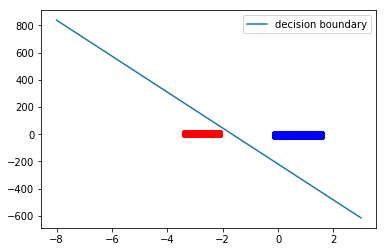

In [69]:
import numpy as np
from collections import Counter
from matplotlib import pyplot as plt

npoints = 5000
X, Y = [], []
# class 0
X.append(np.random.uniform(low=-np.random.uniform(0, 1,size=1)*2, high=np.random.uniform(0, 1,size=1)*5, size=(npoints,)) )
Y.append(np.random.uniform(low=-np.random.uniform(0, 1,size=1)*13, high=np.random.uniform(0, 1,size=1)*4, size=(npoints,)))
# class 1
X.append(np.random.uniform(low=-np.random.uniform(0, 1,size=1)*7, high=-np.random.uniform(0, 1,size=1)*7, size=(npoints,)) )
Y.append(np.random.uniform(low=np.random.uniform(0, 1,size=1)*12, high=np.random.uniform(0, 1,size=1)*3, size=(npoints,)))
learnset = []
for i in range(2):
    # adding points of class i to learnset
    points = zip(X[i], Y[i])
    for p in points:
        learnset.append((p, i))
colours = ["b", "r"]
for i in range(2):
    plt.scatter(X[i], Y[i], c=colours[i])
class Perceptron:
    def __init__(self, input_length,learning_rate, weights=None):
        if weights==None:
            # input_length + 1 because bias needs a weight as well
            self.weights = np.random.random((input_length + 1)) * 2 - 1
        self.learning_rate = learning_rate
        self.bias = 1
    
    @staticmethod
    def sigmoid_function(x):
        res = 1 / (1 + np.power(np.e, -x))
        return 0 if res < 0.5 else 1
        
    def __call__(self, in_data):
        weighted_input = self.weights[:-1] * in_data
        weighted_sum = weighted_input.sum() + self.bias *self.weights[-1]
        return Perceptron.sigmoid_function(weighted_sum)
    
    def adjust(self, 
               target_result, 
               calculated_result,
               in_data):
        error = target_result - calculated_result
        for i in range(len(in_data)):
            correction = error * in_data[i]  *self.learning_rate
            #print("weights: ", self.weights)
            #print(target_result, calculated_result, in_data, error, correction)
            self.weights[i] += correction 
        # correct the bias:
        correction = error * self.bias * self.learning_rate
        self.weights[-1] += correction
p = Perceptron(2,0.1)

def call_1():
    for point, label in learnset:
        p.adjust(label, 
                 p(point), 
                 point)
    evaluation = Counter()
    for point, label in learnset:
        if p(point) == label:
            evaluation["correct"] += 1
        else:
            evaluation["wrong"] += 1
    print(evaluation.most_common())
    colours = ["b", "r"]
    for i in range(2):
        plt.scatter(X[i], Y[i], c=colours[i])
    XR = np.arange(-8, 4)  
    m = -p.weights[0] / p.weights[1]
    b = -p.weights[-1]/p.weights[1]
    print(m, b)
    return XR, m, b,
for i in range(100):   
    XR, m, b = call_1()

plt.plot(XR, m*XR + b, label="decision boundary")
plt.legend()
plt.show()

In [54]:
np.random.uniform(0, 1,size=1)

array([0.81809607])